In [1606]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

daily_pm_df = pd.read_csv("./data/daily_pm.csv")
wkstation_df = pd.read_csv('./data/computer_workstation.csv')

In [1607]:
pain_df = daily_pm_df[['mbl_cod', 'local_time', 'HOMUNCULUS', 'OTHER_DISCOMFORT']]
pain_df['HOMUNCULUS'] = pain_df['HOMUNCULUS'].dropna()
pain_df['OTHER_DISCOMFORT'] = pain_df['OTHER_DISCOMFORT'].str.replace(r'[^\w\s]+', ' ')
pain_df['HOMUNCULUS'] = pain_df['HOMUNCULUS'].str.replace(r'[^\w\s]+', ' ')
pain_df['OTHER_DISCOMFORT'] = pain_df['OTHER_DISCOMFORT'].fillna("none")
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('no', case=False, na=False), 'OTHER_DISCOMFORT'] = "none"
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('na', case=False, na=False), 'OTHER_DISCOMFORT'] = "none"
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('vacation', case=False, na=False), 'OTHER_DISCOMFORT'] = "none"
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('holiday', case=False, na=False), 'OTHER_DISCOMFORT'] = "none"
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('covid', case=False, na=False), 'OTHER_DISCOMFORT'] = "none"
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('blank', case=False, na=False), 'OTHER_DISCOMFORT'] = "none"
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('out', case=False, na=False), 'OTHER_DISCOMFORT'] = "none"

def get_hom_score(txt): 
   if isinstance(txt, str):
      return sum([int(s) for s in txt.split() if s.isdigit()])

def get_month(st):
  st = str(st)
  return int(st.split()[0].split('-')[1])
      
pain_df['HOMUNCULUS'] = pain_df['HOMUNCULUS'].apply(get_hom_score)
pain_df['local_time'] = pain_df['local_time'].apply(get_month)
pain_df = pain_df.loc[pain_df['local_time'] == 10]
pain_df

/var/folders/nd/16zg47z931g2p310yy8g2_8c0000gn/T/ipykernel_5585/2571577749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pain_df['HOMUNCULUS'] = pain_df['HOMUNCULUS'].dropna()
/var/folders/nd/16zg47z931g2p310yy8g2_8c0000gn/T/ipykernel_5585/2571577749.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  pain_df['OTHER_DISCOMFORT'] = pain_df['OTHER_DISCOMFORT'].str.replace(r'[^\w\s]+', ' ')
/var/folders/nd/16zg47z931g2p310yy8g2_8c0000gn/T/ipykernel_5585/2571577749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,mbl_cod,local_time,HOMUNCULUS,OTHER_DISCOMFORT
111,20126808,10,2.0,none
192,22141157,10,0.0,none
193,22141157,10,1.0,none
271,22541511,10,0.0,none
272,22541511,10,0.0,none
...,...,...,...,...
3260,96243591,10,0.0,none
3261,96243591,10,0.0,none
3262,96243591,10,0.0,none
3263,96243591,10,0.0,none


In [1608]:
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('none', case=False, na=False), 'no_pain'] = True
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('chest', case=False, na=False), 'chest'] = True
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('stomach', case=False, na=False), 'stomach'] = True
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('abdomen', case=False, na=False), 'stomach'] = True
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('neck', case=False, na=False), 'neck'] = True
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('back', case=False, na=False), 'back'] = True
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('shoulder', case=False, na=False), 'shoulder'] = True
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('foot', case=False, na=False), 'feet'] = True
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('feet', case=False, na=False), 'feet'] = True
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('hands', case=False, na=False), 'hands'] = True
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('hand', case=False, na=False), 'hands'] = True
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('headache', case=False, na=False), 'head'] = True
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('head', case=False, na=False), 'head'] = True
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('migraine', case=False, na=False), 'head'] = True
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('hips', case=False, na=False), 'hip'] = True
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('hip', case=False, na=False), 'hip'] = True
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('jaw', case=False, na=False), 'jaw'] = True
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('posterior', case=False, na=False), 'posterior'] = True
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('butt', case=False, na=False), 'posterior'] = True
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('leg', case=False, na=False), 'leg'] = True
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('knees', case=False, na=False), 'leg'] = True
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('shin', case=False, na=False), 'leg'] = True
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('calf', case=False, na=False), 'leg'] = True
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('throat', case=False, na=False), 'throat'] = True
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('scapula', case=False, na=False), 'scapula'] = True
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('thigh', case=False, na=False), 'leg'] = True
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('heels', case=False, na=False), 'feet'] = True
pain_df.loc[pain_df['OTHER_DISCOMFORT'].str.contains('sinus', case=False, na=False), 'sinus'] = True
# pain_df.reset_index(inplace=True)
pain_df

,mbl_cod,local_time,HOMUNCULUS,OTHER_DISCOMFORT,no_pain,chest,stomach,neck,back,shoulder,feet,hands,head,hip,jaw,posterior,leg,throat,scapula,sinus
111,20126808,10,2.0,none,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,22141157,10,0.0,none,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,22141157,10,1.0,none,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,22541511,10,0.0,none,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,22541511,10,0.0,none,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3260,96243591,10,0.0,none,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3261,96243591,10,0.0,none,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3262,96243591,10,0.0,none,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3263,96243591,10,0.0,none,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1609]:
# pain_df = (
#  pain_df.assign(pain_id=pain_df['OTHER_DISCOMFORT'].str.split(' '))
#    .explode('pain_id')
#    .reset_index(drop=True)
# )


# pain_df = pain_df.groupby('mbl_cod')[['no_pain', 'chest', 'stomach', 
#                      'neck', 'back', 'shoulder', 'feet', 
#                      'hands','head', 'hip', 'jaw', 'posterior', 
#                      'leg', 'throat', 'scapula', 'feet', 'sinus']].first().reset_index()
pain_df = pain_df.groupby('mbl_cod').agg({'HOMUNCULUS':'mean','no_pain':'first', 'chest':'first', 'stomach':'first', 
                     'neck':'first', 'back':'first', 'shoulder':'first', 'feet':'first', 
                     'hands':'first','head':'first', 'hip':'first', 'jaw':'first', 'posterior':'first', 
                     'leg':'first', 'throat':'first', 'scapula':'first', 'feet':'first', 'sinus':'first'}).reset_index()
pain_df.dropna(subset=['no_pain', 'chest', 'stomach', 
                     'neck', 'back', 'shoulder', 'feet', 
                     'hands','head', 'hip', 'jaw', 'posterior', 
                     'leg', 'throat', 'scapula', 'feet', 'sinus'], how='all', inplace=True)

pain_df.fillna(False)


,mbl_cod,HOMUNCULUS,no_pain,chest,stomach,neck,back,shoulder,feet,hands,head,hip,jaw,posterior,leg,throat,scapula,sinus
0,20126808,2.000000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,22141157,0.500000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,22541511,0.846154,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,23916703,0.000000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,25230030,0.000000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,27148444,1.000000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,32455277,0.000000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,32937810,0.533333,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,33075391,0.000000,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
9,34865333,0.000000,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [1610]:
# pain_df.loc[pain_df['pain_id'].str.contains('none', case=False, na=False), 'no_pain'] = True
# pain_df.loc[pain_df['pain_id'].str.contains('chest', case=False, na=False), 'chest'] = True
# pain_df.loc[pain_df['pain_id'].str.contains('stomach', case=False, na=False), 'stomach'] = True
# pain_df.loc[pain_df['pain_id'].str.contains('abdomen', case=False, na=False), 'stomach'] = True
# pain_df.loc[pain_df['pain_id'].str.contains('neck', case=False, na=False), 'neck'] = True
# pain_df.loc[pain_df['pain_id'].str.contains('back', case=False, na=False), 'back'] = True
# pain_df.loc[pain_df['pain_id'].str.contains('shoulder', case=False, na=False), 'shoulder'] = True
# pain_df.loc[pain_df['pain_id'].str.contains('foot', case=False, na=False), 'feet'] = True
# pain_df.loc[pain_df['pain_id'].str.contains('feet', case=False, na=False), 'feet'] = True
# pain_df.loc[pain_df['pain_id'].str.contains('hands', case=False, na=False), 'hands'] = True
# pain_df.loc[pain_df['pain_id'].str.contains('hand', case=False, na=False), 'hands'] = True
# pain_df.loc[pain_df['pain_id'].str.contains('headache', case=False, na=False), 'head'] = True
# pain_df.loc[pain_df['pain_id'].str.contains('head', case=False, na=False), 'head'] = True
# pain_df.loc[pain_df['pain_id'].str.contains('migraine', case=False, na=False), 'head'] = True
# pain_df.loc[pain_df['pain_id'].str.contains('hips', case=False, na=False), 'hip'] = True
# pain_df.loc[pain_df['pain_id'].str.contains('hip', case=False, na=False), 'hip'] = True
# pain_df.loc[pain_df['pain_id'].str.contains('jaw', case=False, na=False), 'jaw'] = True
# pain_df.loc[pain_df['pain_id'].str.contains('posterior', case=False, na=False), 'posterior'] = True
# pain_df.loc[pain_df['pain_id'].str.contains('butt', case=False, na=False), 'posterior'] = True
# pain_df.loc[pain_df['pain_id'].str.contains('leg', case=False, na=False), 'leg'] = True
# pain_df.loc[pain_df['pain_id'].str.contains('knees', case=False, na=False), 'leg'] = True
# pain_df.loc[pain_df['pain_id'].str.contains('shin', case=False, na=False), 'leg'] = True
# pain_df.loc[pain_df['pain_id'].str.contains('calf', case=False, na=False), 'leg'] = True
# pain_df.loc[pain_df['pain_id'].str.contains('throat', case=False, na=False), 'throat'] = True
# pain_df.loc[pain_df['pain_id'].str.contains('scapula', case=False, na=False), 'scapula'] = True
# pain_df.loc[pain_df['pain_id'].str.contains('thigh', case=False, na=False), 'leg'] = True
# pain_df.loc[pain_df['pain_id'].str.contains('heels', case=False, na=False), 'feet'] = True
# pain_df.loc[pain_df['pain_id'].str.contains('sinus', case=False, na=False), 'sinus'] = True
# pain_df

In [1611]:
# res = []
# for x in pain_df['pain_id'].values:
#     if isinstance(x, str):
#         res.append(x)
# print(res)


# def get_int(val):
#     if isinstance(val, int):
#         return val
#     else:
#         return np.nan
# pain_df['pain_id'] = pain_df['pain_id'].apply(get_int)
# pain_df = pain_df.dropna()

# pain_df.head()

Text(0, 0.5, 'Number of Occurrences')

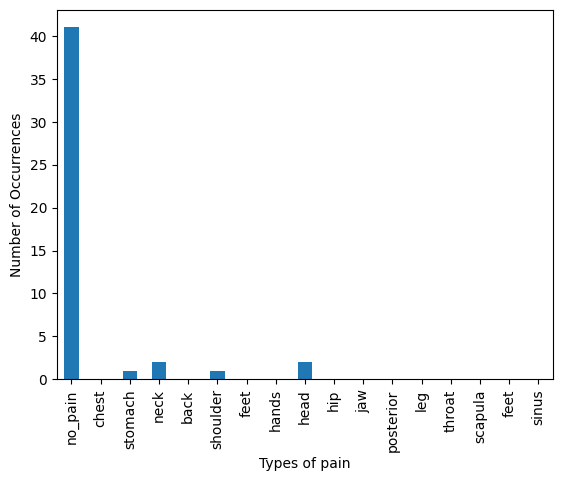

In [1612]:
# only_pain = pain_df.loc[pain_df['pain_id'] > 0]
# only_pain['pain_id'].value_counts().nlargest(10).plot(kind='bar', legend=True, alpha=.5)
only_pain = pain_df[['no_pain', 'chest', 'stomach', 
                     'neck', 'back', 'shoulder', 'feet', 
                     'hands','head', 'hip', 'jaw', 'posterior', 
                     'leg', 'throat', 'scapula', 'feet', 'sinus']].apply(pd.Series.sum)
only_pain.plot(kind='bar')
plt.xlabel("Types of pain")
plt.ylabel("Number of Occurrences")


Text(0.5, 1.0, 'Average Homunculus for each person')

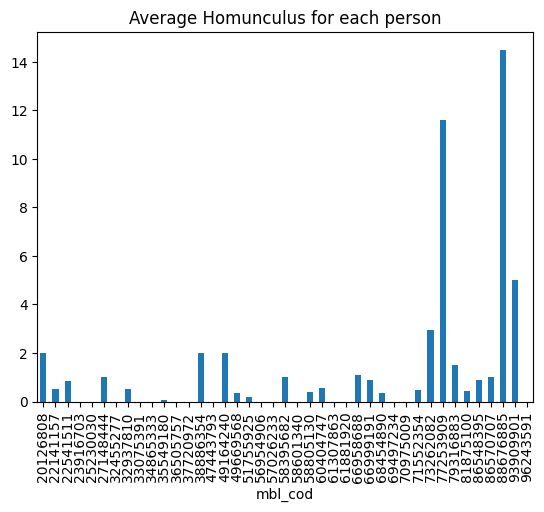

In [1613]:
hom_score = pain_df.loc[:,['mbl_cod', 'HOMUNCULUS']]
hom_score.plot(kind='bar', x='mbl_cod', y='HOMUNCULUS', legend=False)
plt.title("Average Homunculus for each person")

In [1614]:
# other_pain = pain_df.loc[:,['mbl_cod', 'no_pain', 'chest', 'stomach', 
#                      'neck', 'back', 'shoulder', 'feet', 
#                      'hands','head', 'hip', 'jaw', 'posterior', 
#                      'leg', 'throat', 'scapula', 'feet', 'sinus']]
# other_pain = other_pain.groupby('mbl_cod').sum()

# other_pain.plot(kind='bar')
# plt.title("Total number of participants for each type of pain")
# plt.xlabel("Types of pain")
# plt.ylabel("Number of people")

# 0: none, 2: stomach, 3: neck, 5: shoulder, 8: head

In [1615]:
wkstation_15 = wkstation_df[['mbl_cod','local_time','POSTURE_TRAINING', 'METHODS_TRAINING', 
                               'WMSD_SIGNS', 'WORKSTATION_ADJUSTMENT']]
wkstation_15['local_time'] = wkstation_15['local_time'].apply(get_month)
wkst_6month = wkstation_15.loc[wkstation_15['local_time'] == 10]
wkst_6month.reset_index(drop=True, inplace=True)
wkst_6month

/var/folders/nd/16zg47z931g2p310yy8g2_8c0000gn/T/ipykernel_5585/3594334817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wkstation_15['local_time'] = wkstation_15['local_time'].apply(get_month)


,mbl_cod,local_time,POSTURE_TRAINING,METHODS_TRAINING,WMSD_SIGNS,WORKSTATION_ADJUSTMENT
0,22541511,10,1,1,1,1
1,23916703,10,2,2,2,2
2,32455277,10,2,1,1,2
3,34865333,10,2,2,2,2
4,35549180,10,1,1,1,1
5,47443793,10,1,1,1,1
6,49164240,10,2,2,2,2
7,51755925,10,1,1,1,1
8,58395682,10,1,1,1,1
9,58805130,10,2,2,2,2


In [1616]:
merged = pain_df.merge(wkst_6month, on='mbl_cod', how='left')
merged.dropna(subset=['POSTURE_TRAINING', 'METHODS_TRAINING', 'WMSD_SIGNS', 'WORKSTATION_ADJUSTMENT'], inplace=True)

merged['total_score'] = (merged['POSTURE_TRAINING'] + merged['METHODS_TRAINING'] 
             + merged['WMSD_SIGNS'] + merged['WORKSTATION_ADJUSTMENT'])
# merged.head()
merged

,mbl_cod,HOMUNCULUS,no_pain,chest,stomach,neck,back,shoulder,feet,hands,...,leg,throat,scapula,sinus,local_time,POSTURE_TRAINING,METHODS_TRAINING,WMSD_SIGNS,WORKSTATION_ADJUSTMENT,total_score
2,22541511,0.846154,True,None,None,None,None,None,None,None,...,None,None,None,None,10.0,1.0,1.0,1.0,1.0,4.0
3,23916703,0.000000,True,None,None,None,None,None,None,None,...,None,None,None,None,10.0,2.0,2.0,2.0,2.0,8.0
6,32455277,0.000000,True,None,None,None,None,None,None,None,...,None,None,None,None,10.0,2.0,1.0,1.0,2.0,6.0
9,34865333,0.000000,True,None,None,None,None,None,None,None,...,None,None,None,None,10.0,2.0,2.0,2.0,2.0,8.0
10,35549180,0.071429,True,None,None,None,None,None,None,None,...,None,None,None,None,10.0,1.0,1.0,1.0,1.0,4.0
14,47443793,0.000000,True,None,None,None,None,None,None,None,...,None,None,None,None,10.0,1.0,1.0,1.0,1.0,4.0
15,49164240,2.000000,True,None,None,None,None,None,None,None,...,None,None,None,None,10.0,2.0,2.0,2.0,2.0,8.0
17,51755925,0.200000,True,None,None,None,None,None,None,None,...,None,None,None,None,10.0,1.0,1.0,1.0,1.0,4.0
20,58395682,1.000000,True,None,None,None,None,None,None,None,...,None,None,None,None,10.0,1.0,1.0,1.0,1.0,4.0
22,58805130,0.400000,True,None,None,None,None,None,None,None,...,None,None,None,None,10.0,2.0,2.0,2.0,2.0,8.0


Text(0.5, 1.0, 'Number of people for each score')

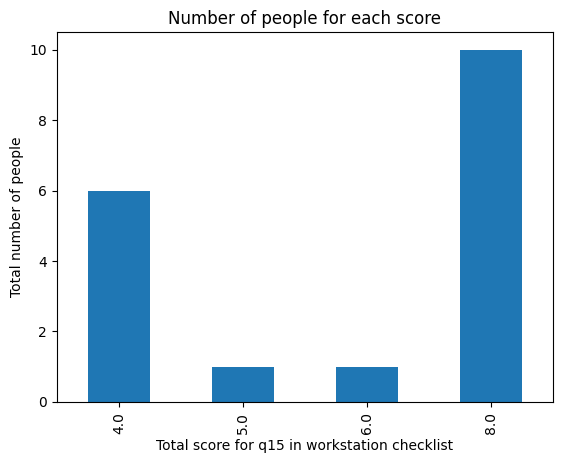

In [1617]:
# merged['total_score'].value_counts().plot(kind='bar', legend=False, alpha=0.5)
merged.groupby('total_score')['mbl_cod'].nunique().plot(kind='bar')
plt.xlabel("Total score for q15 in workstation checklist")
plt.ylabel("Total number of people")
plt.title("Number of people for each score")

In [1618]:
hom_vs_q15 = merged.loc[:, ['mbl_cod','HOMUNCULUS', 'total_score']]
# hom_vs_q15 = hom_vs_q15.groupby('mbl_cod').agg({'HOMUNCULUS':'mean', 'total_score':'mean'})
# hom_vs_q15.head()
hom_vs_q15

,mbl_cod,HOMUNCULUS,total_score
2,22541511,0.846154,4.0
3,23916703,0.000000,8.0
6,32455277,0.000000,6.0
9,34865333,0.000000,8.0
10,35549180,0.071429,4.0
14,47443793,0.000000,4.0
15,49164240,2.000000,8.0
17,51755925,0.200000,4.0
20,58395682,1.000000,4.0
22,58805130,0.400000,8.0


Text(0.5, 1.0, 'Total score vs Homunculus average for each person')

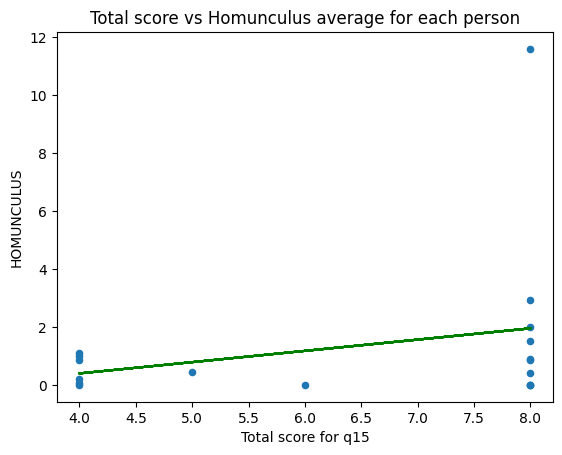

In [1619]:
hom_vs_q15.plot(kind='scatter', x='total_score', y='HOMUNCULUS')
x=hom_vs_q15['total_score']
y=hom_vs_q15['HOMUNCULUS']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='green')
plt.xlabel("Total score for q15")
plt.title("Total score vs Homunculus average for each person")

In [1620]:
otherpain_vs_q15 = merged.loc[:, ['mbl_cod', 'no_pain', 'chest', 'stomach', 'neck', 'back', 
                                  'shoulder', 'feet', 'hands','head', 'hip', 'jaw', 
                                  'posterior', 'leg', 'throat', 'scapula', 'feet', 'sinus', 
                                  'total_score', 'POSTURE_TRAINING', 'METHODS_TRAINING', 
                                  'WMSD_SIGNS', 'WORKSTATION_ADJUSTMENT']]
# otherpain_vs_q15 = otherpain_vs_q15.groupby('pain_id').mean()
otherpain_vs_q15.groupby(['mbl_cod','total_score', 'POSTURE_TRAINING', 
                          'METHODS_TRAINING', 'WMSD_SIGNS', 
                          'WORKSTATION_ADJUSTMENT'])['no_pain', 'chest', 'stomach', 'neck', 'back', 
                                  'shoulder', 'feet', 'hands','head', 'hip', 'jaw', 
                                  'posterior', 'leg', 'throat', 'scapula', 'feet', 'sinus'].first()
otherpain_vs_q15.head()

/var/folders/nd/16zg47z931g2p310yy8g2_8c0000gn/T/ipykernel_5585/2445728186.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  otherpain_vs_q15.groupby(['mbl_cod','total_score', 'POSTURE_TRAINING',


,mbl_cod,no_pain,chest,stomach,neck,back,shoulder,feet,hands,head,...,leg,throat,scapula,feet,sinus,total_score,POSTURE_TRAINING,METHODS_TRAINING,WMSD_SIGNS,WORKSTATION_ADJUSTMENT
2,22541511,True,None,None,None,None,None,None,None,None,...,None,None,None,None,None,4.0,1.0,1.0,1.0,1.0
3,23916703,True,None,None,None,None,None,None,None,None,...,None,None,None,None,None,8.0,2.0,2.0,2.0,2.0
6,32455277,True,None,None,None,None,None,None,None,None,...,None,None,None,None,None,6.0,2.0,1.0,1.0,2.0
9,34865333,True,None,None,None,None,None,None,None,True,...,None,None,None,None,None,8.0,2.0,2.0,2.0,2.0
10,35549180,True,None,None,None,None,None,None,None,None,...,None,None,None,None,None,4.0,1.0,1.0,1.0,1.0
